# Sample Signal Events

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import tsai
from tsai.all import *
print('tsai       :', tsai.__version__)
print('fastai     :', fastai.__version__)
print('fastcore   :', fastcore.__version__)
print('torch      :', torch.__version__)

/home/doug/anaconda3/envs/tsai2/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729062494/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


tsai       : 0.2.17
fastai     : 2.2.7
fastcore   : 1.3.19
torch      : 1.7.0


In [3]:
from proto_gen_event_signals import get_sample_data
import numpy as np
import matplotlib.pyplot as plt

# Code

# Tests

#### Verify correct number of outputs based on options

In [4]:
assert len(get_sample_data(length=1000, n_sig=3)) == 3
assert len(get_sample_data(length=1000, n_sig=3, n_fold=2)) == 4
assert len(get_sample_data(length=1000, n_sig=3, split_pct=0.2)) == 4
assert len(get_sample_data(length=1000, n_sig=3, split_pct=(0.2, 0.1))) == 4

#### Show sample folds and splits and verify lengths

In [5]:
n_sig=5
_,_,_,folds = get_sample_data(length=1000, n_sig=n_sig, n_fold=2)
_,_,_,split2 = get_sample_data(length=1000, n_sig=n_sig, split_pct=0.2)  # train/valid
_,_,_,split3 = get_sample_data(length=1000, n_sig=n_sig, split_pct=(0.2, 0.1)) # train/valid/test
assert len(folds) == n_sig
assert len(split2) == 2
assert len(split3) == 3
print(type(folds), type(split2), type(split3))
folds, split2, split3

<class 'numpy.ndarray'> <class 'fastcore.foundation.L'> <class 'fastcore.foundation.L'>


(array([0, 0, 1, 0, 1]), (#2) [[0, 1, 2, 4],[3]], (#3) [[0, 1, 2],[3],[4]])

#### Show signals with events - fixed signal length

X:(3, 1000)  y:3  events:3


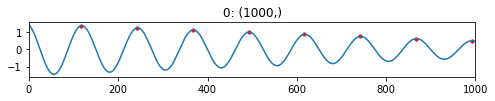

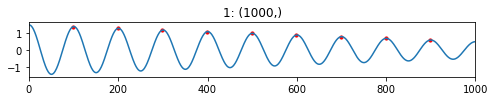

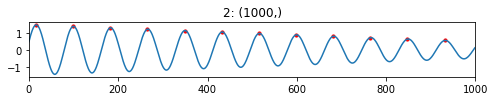

In [6]:
X, y, events = get_sample_data(length=1000, n_sig=3)
print(f'X:{X.shape}  y:{len(y)}  events:{len(events)}')
for i, sig in enumerate(X):
    plt.figure(figsize=(8, 1))
    plt.title(f'{i}: {sig.shape}')
    plt.plot(np.arange(len(sig)), sig)
    plt.scatter(events[i], sig[events[i]], c='r', s=10)
    plt.xlim(0, len(sig))
    plt.show()

#### Show signals with events - include dinm for channel

X:(2, 1, 1000)  y:2  events:2


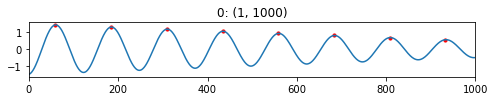

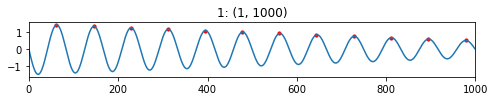

In [7]:
X, y, events = get_sample_data(length=1000, n_sig=2, dims=3)
print(f'X:{X.shape}  y:{len(y)}  events:{len(events)}')
for i, sig in enumerate(X):
    plt.figure(figsize=(8, 1))
    plt.title(f'{i}: {sig.shape}')
    plt.plot(np.arange(sig.shape[-1]), sig[0])
    plt.scatter(events[i], sig[0,events[i]], c='r', s=10)
    plt.xlim(0, sig.shape[-1])
    plt.show()

#### Show signals with events - variable signal length

X:(3,)  y:3  events:3


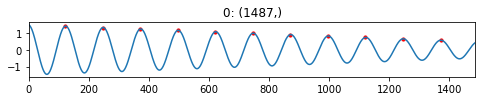

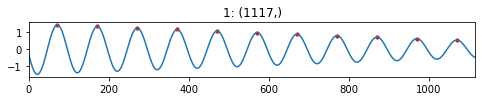

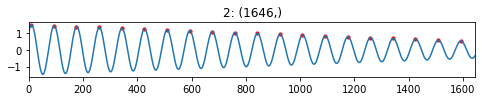

In [8]:
X, y, events = get_sample_data(length=(1000, 2000), n_sig=3)
print(f'X:{X.shape}  y:{len(y)}  events:{len(events)}')
for i, sig in enumerate(X):
    plt.figure(figsize=(8,1))
    plt.title(f'{i}: {sig.shape}')
    plt.plot(np.arange(len(sig)), sig)
    plt.scatter(events[i], sig[events[i]], c='r', s=10)
    plt.xlim(0, len(sig))
    plt.show()